In [1]:
import pandas as pd
# Load the dataset
data = pd.read_csv('New_data.csv')  # Replace with your actual file path

# View the first few rows
print(data.head())

# Check data types and missing values
print(data.info())

# Summary statistics for numeric columns
print(data.describe())

   Score    Age_Group                          Profession CyberCrime_Aware  \
0     44  22-29 Years                                  UG              Yes   
1     96  22-29 Years                                  UG              Yes   
2     16  16-21 Years  School (10 or 11 or 12th Standard)              Yes   
3     88  22-29 Years                                  UG              Yes   
4     88  22-29 Years                                  PG              Yes   

  Victim_Experience                 Lost_Money  
0               Yes             less than 5000  
1               Yes  I did not loose any money  
2                No             less than 5000  
3                No  I did not loose any money  
4               Yes  I did not loose any money  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Score              350 non-null   

In [2]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values (example: mean for Score, mode for categorical data)
data['Score'].fillna(data['Score'].mean(), inplace=True)
data['Age_Group'].fillna(data['Age_Group'].mode()[0], inplace=True)
data['Profession'].fillna(data['Profession'].mode()[0], inplace=True)

# Optionally, drop rows with missing values
data.dropna(inplace=True)

Score                0
Age_Group            0
Profession           0
CyberCrime_Aware     0
Victim_Experience    0
Lost_Money           0
dtype: int64


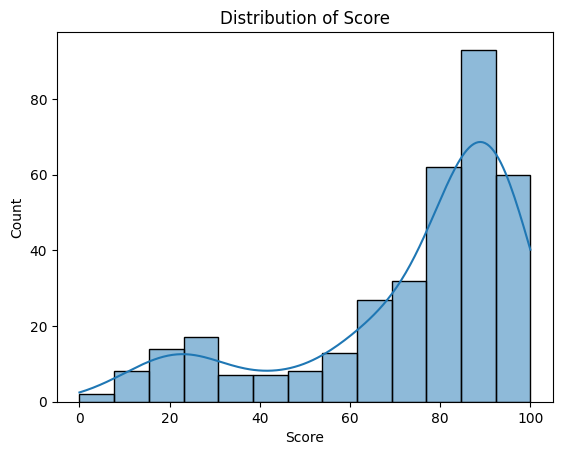

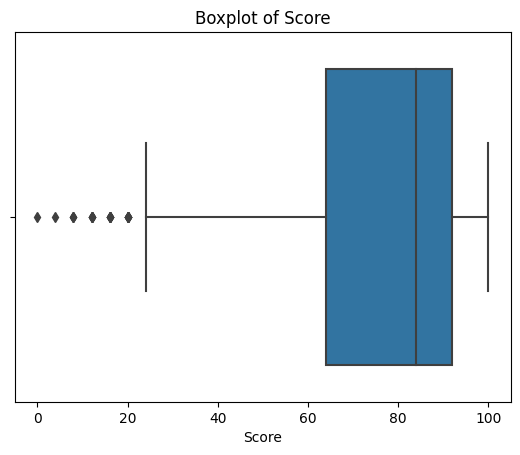

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
sns.histplot(data['Score'], kde=True)
plt.title('Distribution of Score')
plt.show()

# Boxplot
sns.boxplot(x=data['Score'])
plt.title('Boxplot of Score')
plt.show()


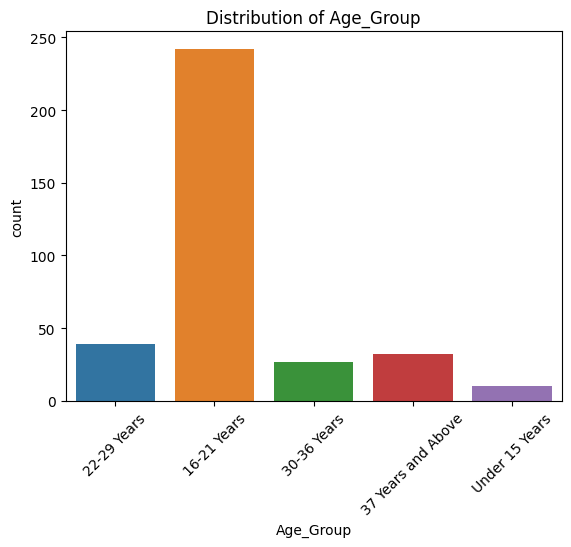

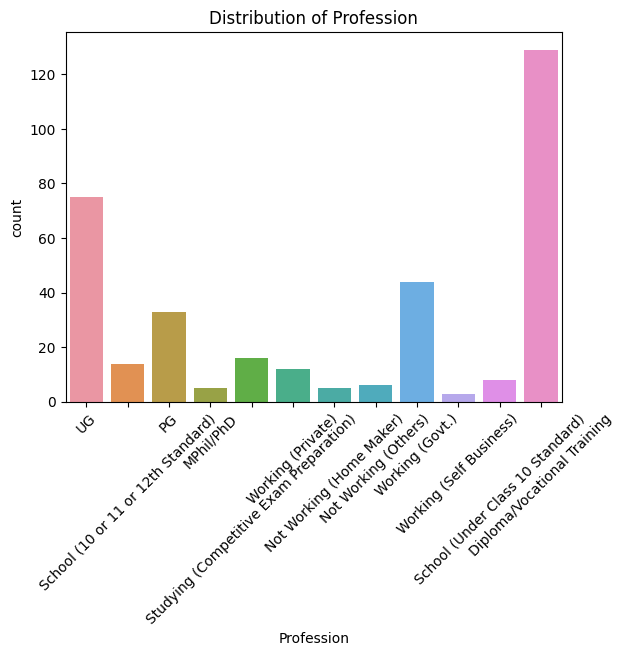

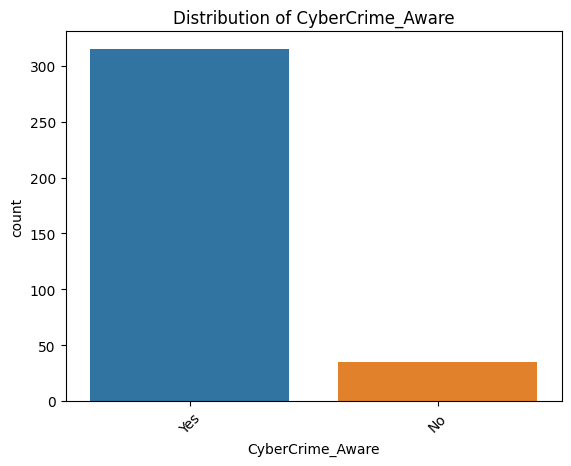

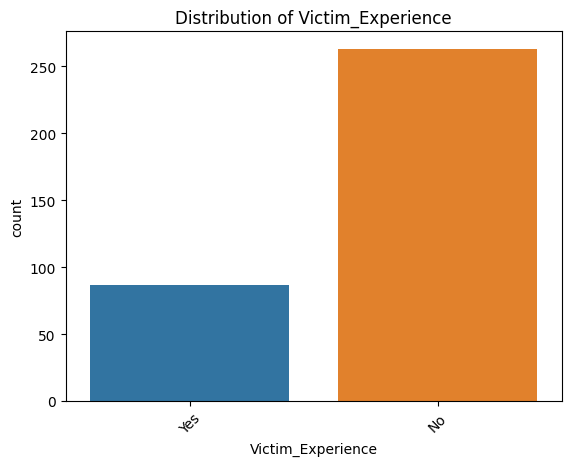

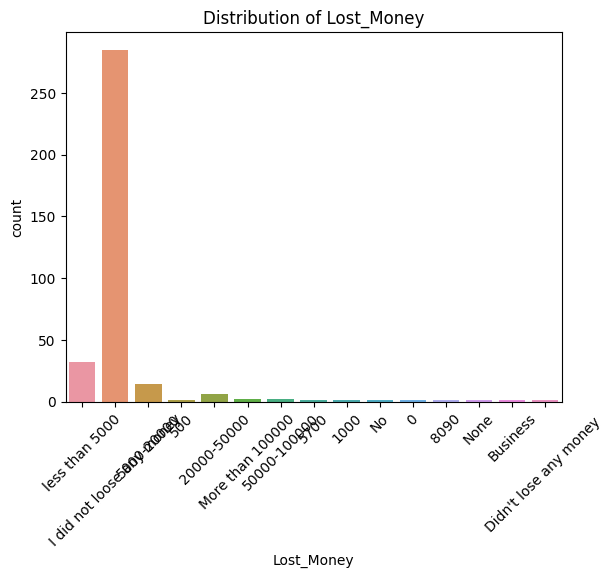

In [4]:
# Count plots
categorical_cols = ['Age_Group', 'Profession', 'CyberCrime_Aware', 'Victim_Experience', 'Lost_Money']

for col in categorical_cols:
    sns.countplot(x=data[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


C:\Users\91991\AppData\Local\Temp\ipykernel_15416\3780762901.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


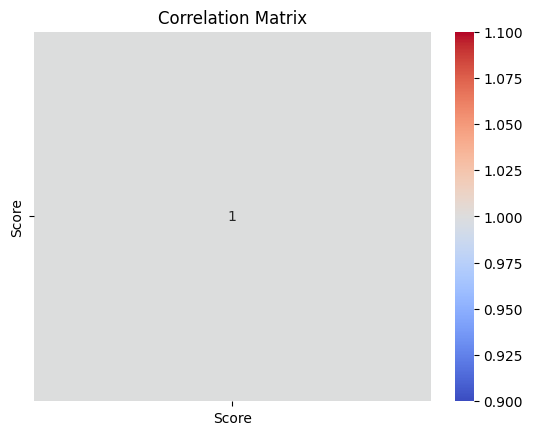

In [5]:
# Correlation matrix
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

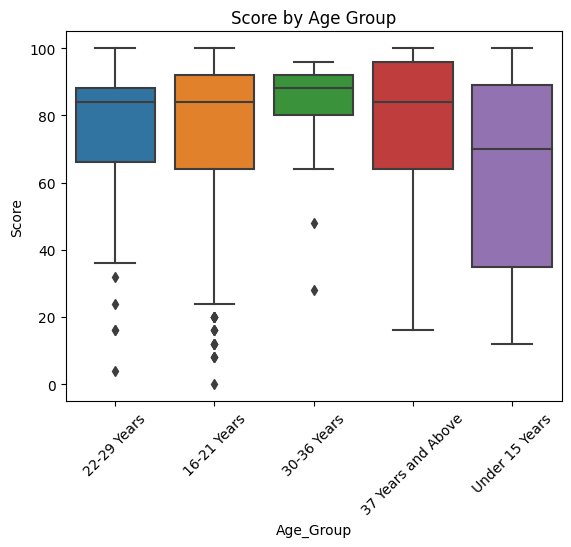

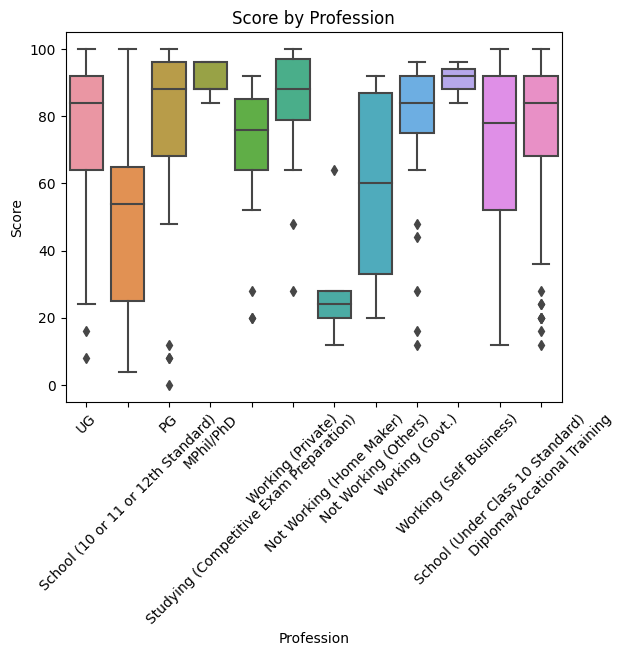

In [6]:
# Boxplots
sns.boxplot(x='Age_Group', y='Score', data=data)
plt.title('Score by Age Group')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x='Profession', y='Score', data=data)
plt.title('Score by Profession')
plt.xticks(rotation=45)
plt.show()


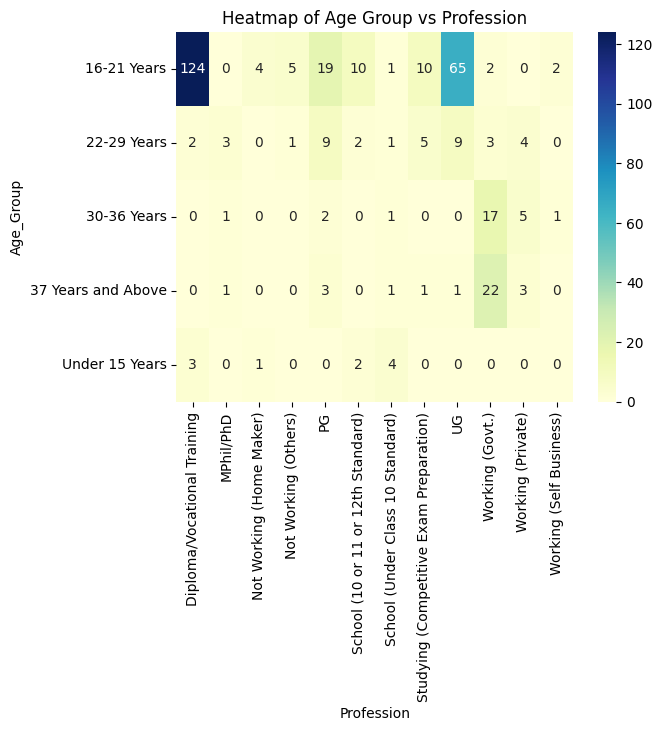

In [7]:
# Cross-tabulation
crosstab = pd.crosstab(data['Age_Group'], data['Profession'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Age Group vs Profession')
plt.show()

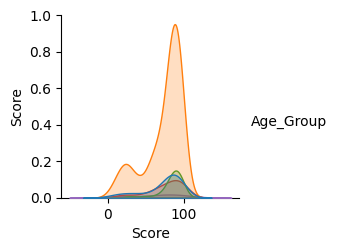

In [8]:
# Pairplot
sns.pairplot(data, hue='Age_Group', diag_kind='kde')
plt.show()

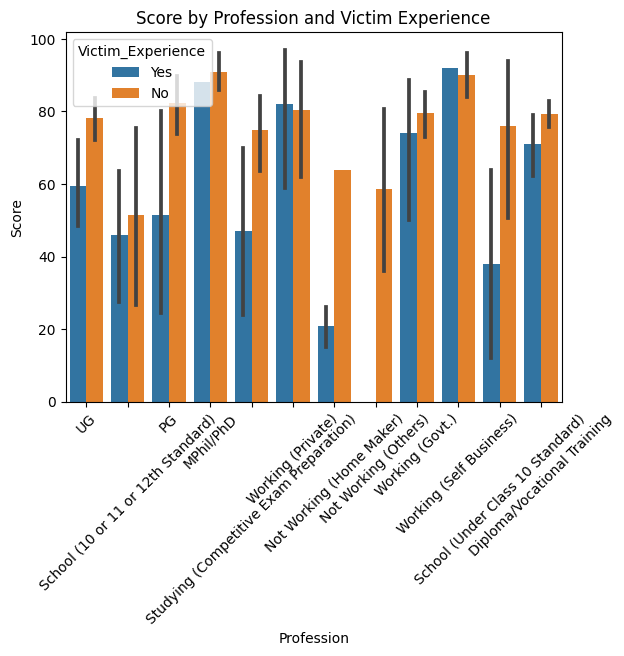

In [9]:
# Example: How does Profession and Victim_Experience interact to affect Score?
sns.barplot(x='Profession', y='Score', hue='Victim_Experience', data=data)
plt.title('Score by Profession and Victim Experience')
plt.xticks(rotation=45)
plt.show()


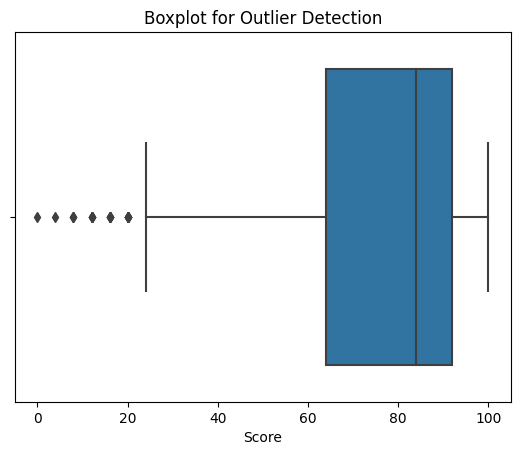

In [10]:
# Boxplot to identify outliers
sns.boxplot(x=data['Score'])
plt.title('Boxplot for Outlier Detection')
plt.show()

# Optionally, remove outliers using IQR
Q1 = data['Score'].quantile(0.25)
Q3 = data['Score'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['Score'] >= lower_bound) & (data['Score'] <= upper_bound)]


In [11]:
data.to_csv('cleaned_cybercrime_data.csv', index=False)